# Toy Genetic Algorithm
Don't know how the fuck to use a genetic algorithm? No prob! There's an example here >:)

Based on Example 3 of [this PyGAD documentation page](https://pygad.readthedocs.io/en/latest/README_pygad_torchga_ReadTheDocs.html).
### Importing libraries

In [12]:
import torch
import pygad
import pygad.torchga as torchga
import numpy

### Functions

In [10]:
def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, torch_ga, model, loss_function

    predictions = pygad.torchga.predict(model=model,
                                        solution=solution,
                                        data=data_inputs)

    solution_fitness = 1.0 / (loss_function(predictions, data_outputs).detach().numpy() + 0.00000001)

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))


### Building the PyTorch and GA models

In [13]:
# Build the PyTorch model using the functional API.
input_layer = torch.nn.Linear(360, 50)
relu_layer = torch.nn.ReLU()
dense_layer = torch.nn.Linear(50, 4)
output_layer = torch.nn.Softmax(1)

model = torch.nn.Sequential(input_layer,
                            relu_layer,
                            dense_layer,
                            output_layer)

# Create an instance of the pygad.torchga.TorchGA class to build the initial population.
torch_ga = torchga.TorchGA(model=model,
                           num_solutions=10)

loss_function = torch.nn.CrossEntropyLoss()

### Data and shit

In [21]:
root = "/Users/adrianaladera/Desktop/MIT/research/datasets"
# Data inputs
data_inputs = torch.from_numpy(numpy.load("{}/dataset_features.npy".format(root))).float()

# Data outputs
data_outputs = torch.from_numpy(numpy.load("{}/outputs.npy".format(root))).long()
# The next 2 lines are equivelant to this Keras function to perform 1-hot encoding: tensorflow.keras.utils.to_categorical(data_outputs)
# temp_outs = numpy.zeros((data_outputs.shape[0], numpy.unique(data_outputs).size), dtype=numpy.uint8)
# temp_outs[numpy.arange(data_outputs.shape[0]), numpy.uint8(data_outputs)] = 1

# Prepare the PyGAD parameters. Check the documentation for more information: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
num_generations = 200 # Number of generations.
num_banging_times = 5 # Number of solutions to be selected as parents in the mating pool.
initial_population = torch_ga.population_weights # Initial population of network weights.

### Run this bad boi

In [22]:
# Create an instance of the pygad.GA class
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_banging_times,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

# Start the genetic algorithm evolution.
ga_instance.run()

Generation = 1
Fitness    = 0.8079983275049734
Generation = 2
Fitness    = 0.8079983275049734
Generation = 3
Fitness    = 0.8079983275049734
Generation = 4
Fitness    = 0.8079983275049734
Generation = 5
Fitness    = 0.8082466723615622
Generation = 6
Fitness    = 0.9151853266786855
Generation = 7
Fitness    = 0.9151853266786855
Generation = 8
Fitness    = 0.9376051469929322
Generation = 9
Fitness    = 0.9376051469929322
Generation = 10
Fitness    = 0.9376051469929322
Generation = 11
Fitness    = 0.9829265698262174
Generation = 12
Fitness    = 1.0040995264591845
Generation = 13
Fitness    = 1.0040995264591845
Generation = 14
Fitness    = 1.0040995264591845
Generation = 15
Fitness    = 1.0040995264591845
Generation = 16
Fitness    = 1.0040995264591845
Generation = 17
Fitness    = 1.0040995264591845
Generation = 18
Fitness    = 1.0040995264591845
Generation = 19
Fitness    = 1.0040995264591845
Generation = 20
Fitness    = 1.0040995264591845
Generation = 21
Fitness    = 1.0040995264591845
G

### Plotty this hottie

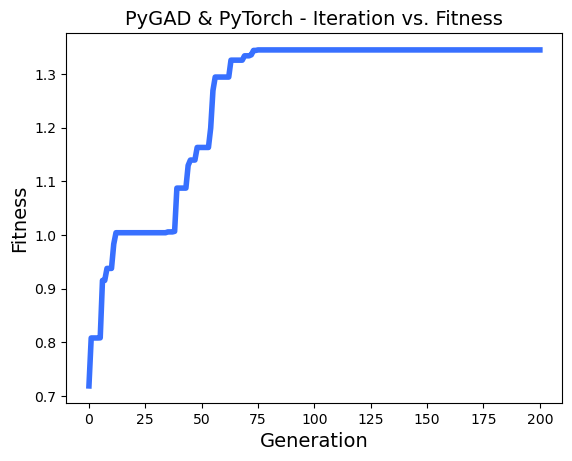

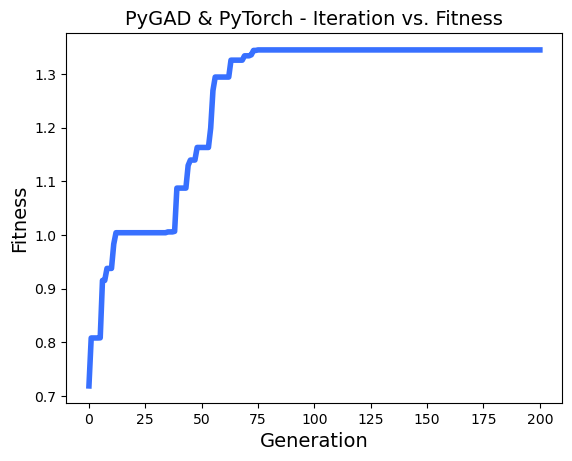

In [23]:
# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness(title="PyGAD & PyTorch - Iteration vs. Fitness", linewidth=4)

### Analysis of the GA (GA anal)

In [20]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = torchga.model_weights_as_dict(model=model,
                                                        weights_vector=solution)
model.load_state_dict(best_solution_weights)
predictions = model(data_inputs)

# Calculate the crossentropy loss of the trained model.
print("Crossentropy : ", loss_function(predictions, data_outputs).detach().numpy())

# Calculate the classification accuracy for the trained model.
accuracy = torch.sum(torch.max(predictions, axis=1).indices == data_outputs) / len(data_outputs)
print("Accuracy : ", accuracy.detach().numpy())

Fitness value of the best solution = 1.3446852613265452
Index of the best solution : 0
Crossentropy :  0.74366844
Accuracy :  1.0


In [24]:
print("Predictions : \n", predictions)

Predictions : 
 tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]], grad_fn=<SoftmaxBackward0>)
